<a href="https://colab.research.google.com/github/siddharth0517/Loan-Approval-Classification/blob/main/Loan_Approval_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loan Approval Classification

**1. Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**2. Load Dataset**

In [2]:
dataset = pd.read_csv('loan_data.csv')

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

*NO Missing Values Present in Dataset*

In [4]:
dataset.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


**3. EDA**

**Distribution Of Loan Status**

In [10]:
dataset['loan_status_label'] = dataset['loan_status'].map({1: 'Passed', 0: 'Not Passed'})

<ipython-input-11-4c29ea38298b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dataset, x='loan_status_label', palette='Set2')


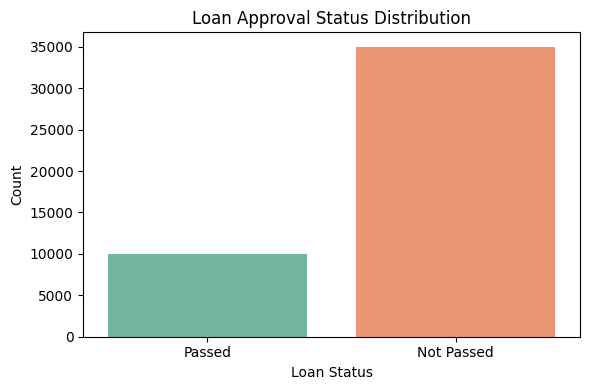

In [11]:
plt.figure(figsize=(6, 4))
sns.countplot(data=dataset, x='loan_status_label', palette='Set2')
plt.title('Loan Approval Status Distribution')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

**Gender vs Loan Status**

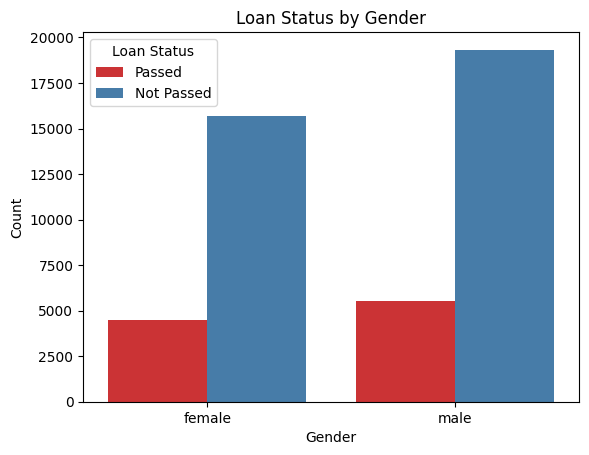

In [12]:
sns.countplot(data=dataset, x='person_gender', hue='loan_status_label', palette='Set1')
plt.title('Loan Status by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Loan Status')
plt.show()


**Home Ownership vs Loan Status**

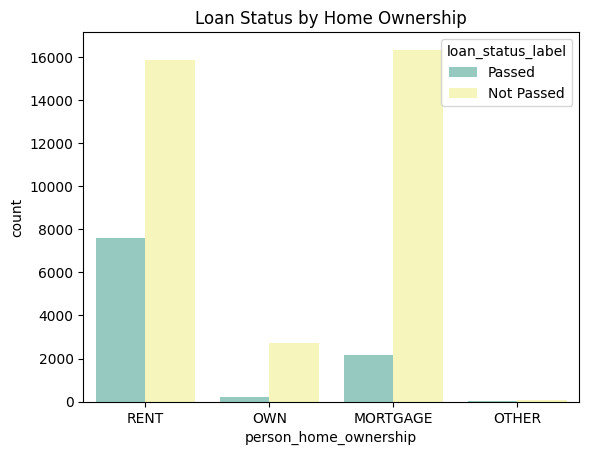

In [13]:
sns.countplot(data=dataset, x='person_home_ownership', hue='loan_status_label', palette='Set3')
plt.title('Loan Status by Home Ownership')
plt.show()

**Loan Intent vs Loan Status**

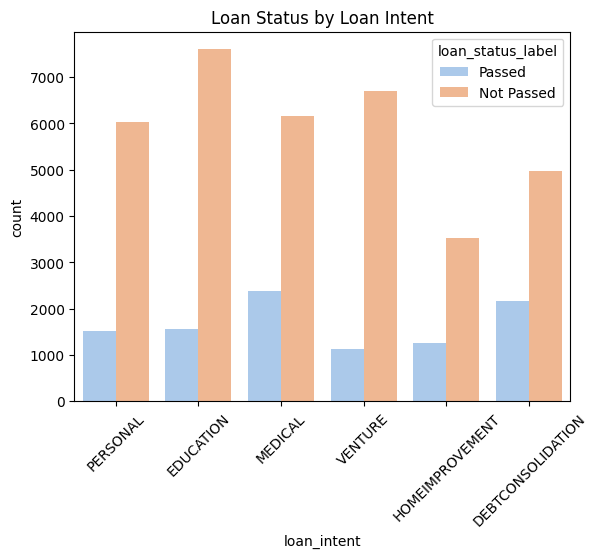

In [14]:
sns.countplot(data=dataset, x='loan_intent', hue='loan_status_label', palette='pastel')
plt.title('Loan Status by Loan Intent')
plt.xticks(rotation=45)
plt.show()

**Correlation Heatmap**

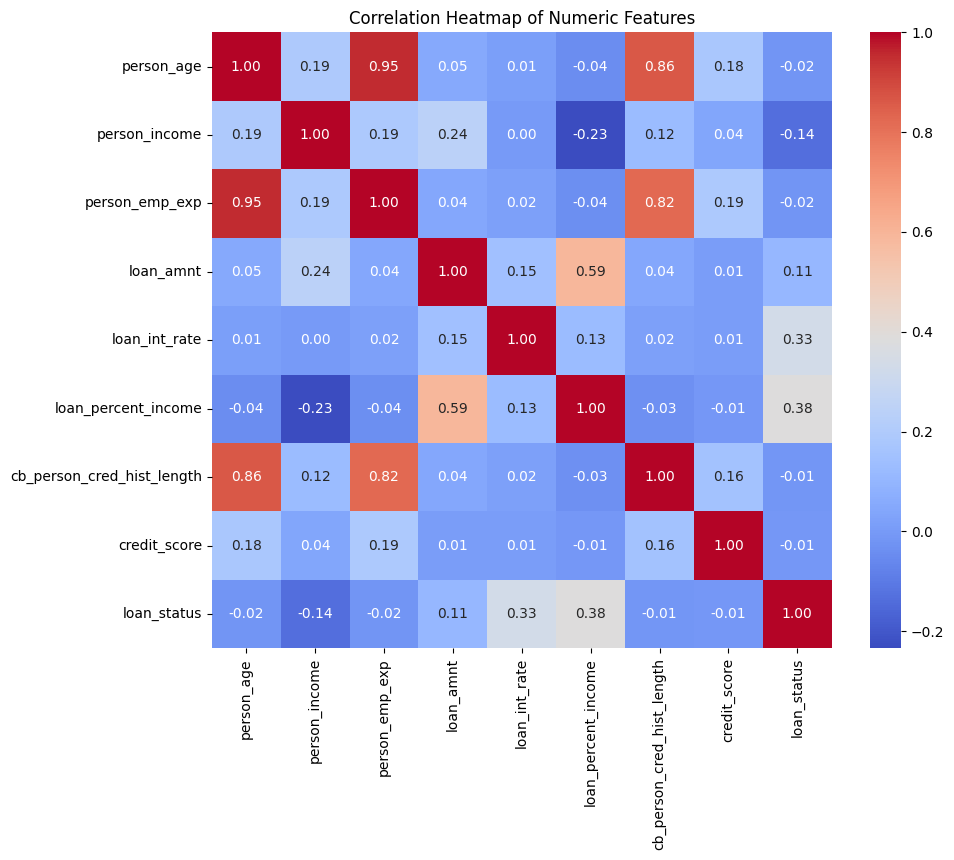

In [15]:
plt.figure(figsize=(10, 8))
sns.heatmap(dataset.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

**BoxPlot For Income Distribution**

<ipython-input-16-50ef1fda7e7d>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dataset, x='loan_status_label', y='person_income', palette='Set2')


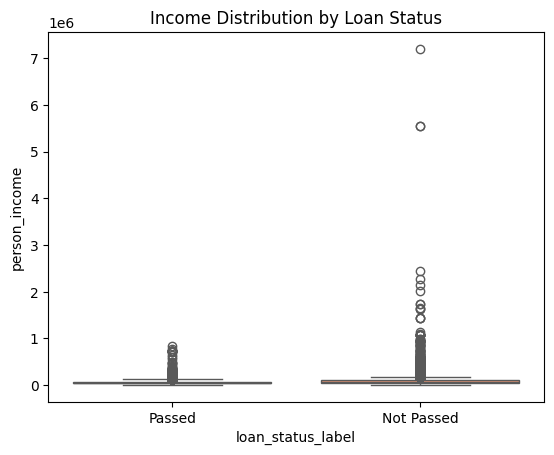

In [16]:
sns.boxplot(data=dataset, x='loan_status_label', y='person_income', palette='Set2')
plt.title('Income Distribution by Loan Status')
plt.show()

**4. Encoding For Categorical Data**

In [17]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in dataset.select_dtypes(include='object').columns:
    dataset[col] = le.fit_transform(dataset[col])


**5. Splitting Training and Testing Dataset**

In [20]:
X = dataset.drop(columns=['loan_status', 'loan_status_label'])
y = dataset['loan_status']

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**6. Training The Model Using Random Forest Classifier**

In [22]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

**7. Predicting the Model**

In [24]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(X_test)


**8. Evaluating The Model**

In [25]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9286666666666666
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.95      6990
           1       0.89      0.78      0.83      2010

    accuracy                           0.93      9000
   macro avg       0.91      0.87      0.89      9000
weighted avg       0.93      0.93      0.93      9000



**Confusion Matrix**

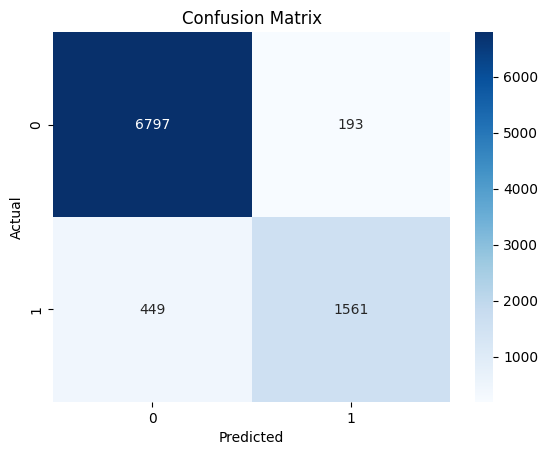

In [26]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()